# Dynamic Programming

Take a recursive algorithm and identify the overlapping subproblems (repeated calls). Cache those results for future recursive calls. Alternatively, implement something iterative.

Advantages:

Disadvantages:
- Recursive algorithms can be space inefficient since each call adds a new layer to the stack.
    - Implementing it iteratively can save space, but the code will likely be more complex.

Tradeoffs to discuss:
- Implementing an algorithm recursively vs iteratively (tradeoff space for complexity of code)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Example 1: Fibonacci Numbers

#### Naive Recursive Solution

In [2]:
def fib_recursive(n):
    """Calculates the nth (zero-indexed) Fibonacci number.
    Time complexity (upper bound): O(2**n).
    """
    if n == 0 or n == 1:
        return 1
    return fib_recursive(n-1) + fib_recursive(n-2)

In [3]:
def num_calls_for_fib_recursive(n):
    """Calculates then number of calls for fib_recursive(n).
    Time complexity (upper bound): O(2**n).
    """
    if n == 0 or n == 1:
        return 1
    return num_calls_for_fib_recursive(n-1) + num_calls_for_fib_recursive(n-2) + 1

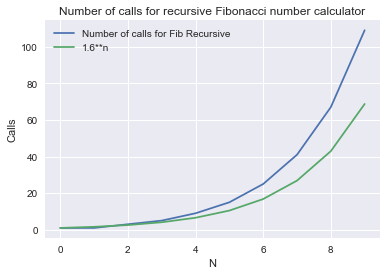

In [24]:
num_calls = list(map(num_calls_for_fib_recursive, range(10)))
plt.plot(range(10), num_calls, label="Number of calls for Fib Recursive")
plt.title("Number of calls for recursive Fibonacci number calculator")
plt.xlabel("N")
plt.ylabel("Calls")
plt.plot(range(10), list(map(lambda x:1.6**x, range(10))), label="1.6**n")
plt.legend()

#### Top-Down Dynamic Programming Solution

In [27]:
from collections import defaultdict

In [36]:
# defaultdict 
fibs = defaultdict(int)
fibs[0] = 1
fibs[1] = 1
def fib_top_down(n, fibs):
    """Calculates the nth (zero-indexed) Fibonacci number.
    Time complexity (upper bound): O(n).
    Space complexity: O(n).
    """
    if n == 0 or n == 1:
        return 1
    if fibs[n] != 0:
        return fibs[n]
    nth_fib = fib_top_down(n-1, fibs) + fib_top_down(n-2, fibs)
    fibs[n] = nth_fib
    return nth_fib

In [37]:
fib_top_down(5, fibs)

8

#### Bottom-Up Dynamic Programming Solution

In [42]:
fibs2 = defaultdict(int)
fibs2[0] = 1
fibs2[1] = 1
def fib_bottom_up(n, fibs):
    """Calculates the nth (zero-indexed) Fibonacci number.
    Time complexity (upper bound): O(n).
    Space complexity: O(n)"""
    if n == 0 or n == 1:
        return 1
    for i in range(2, n+1):
        if fibs[i] == 0:
            fibs[i] = fibs[i-1] + fibs[i-2]
    return fibs[n]

In [43]:
fib_bottom_up(10, fibs2)

89

In [44]:
def fib_bottom_up_no_store(n):
    """Calculates the nth (zero-indexed) Fibonacci number.
    Expected to run only once so does not store intermediate Fibonacci values
    and so takes up less space.
    Time complexity: O(n).
    Space complexity: O(1).
    """
    if n == 0 or n == 1:
        return 1
    f1 = 1
    f2 = 1
    for i in range(2, n+1):
        f = f1 + f2
        f2 = f1
        f1 = f
    return f

In [45]:
fib_bottom_up_no_store(10)

89

References:
- G. Laakmann-McDowell, Cracking the Coding Interview